In [230]:

import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random

In [231]:
np.random.seed(0)

In [232]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [233]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [234]:
assert(X_train.shape[0] == y_train.shape[0]), "No. of images not equal to no. of labels"
assert(X_test.shape[0] == y_test.shape[0]), "No. of images not equal to no. of labels"
assert(X_train.shape[1:] == (28,28)), "The dimensions of imaes are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of imaes are not 28x28"

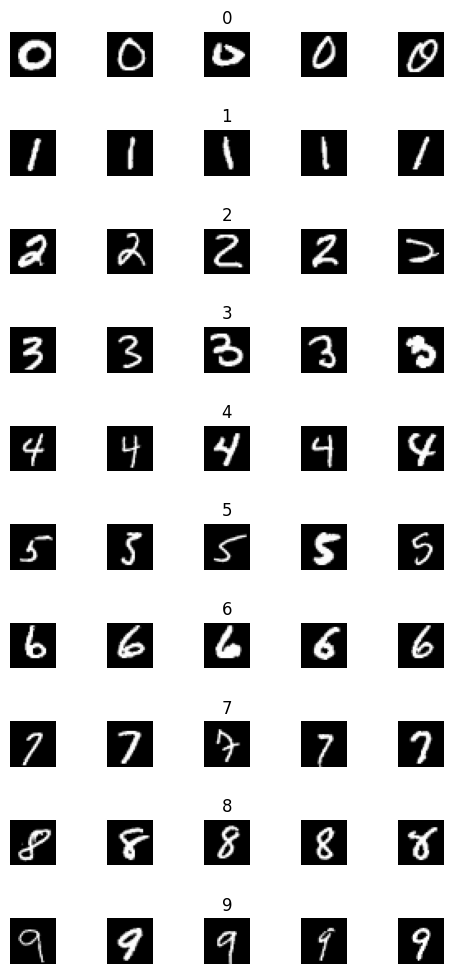

In [235]:
num_of_samples = []
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5,10))
fig.tight_layout()

for i in range (cols):
    for j in range (num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), : :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'No. of images')

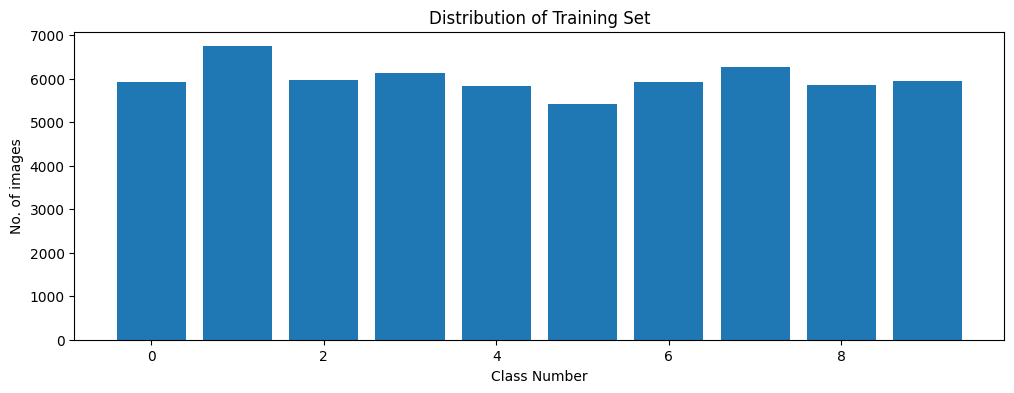

In [236]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of Training Set")
plt.xlabel("Class Number")
plt.ylabel("No. of images")

In [237]:
#OneHot Encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [238]:
#Normalizing the data
X_train = X_train/255
X_test = X_test/255

In [239]:
#Flattenning 28x28 image arrays to 784 1-D array
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [240]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [241]:
model =create_model()
print(model.summary())

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,070 (31.52 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

None


In [242]:
h = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7386 - loss: 0.7979 - val_accuracy: 0.9268 - val_loss: 0.2672
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9147 - loss: 0.2875 - val_accuracy: 0.9410 - val_loss: 0.2097
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9271 - loss: 0.2471 - val_accuracy: 0.9422 - val_loss: 0.2080
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9354 - loss: 0.2191 - val_accuracy: 0.9463 - val_loss: 0.1880
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9401 - loss: 0.2039 - val_accuracy: 0.9482 - val_loss: 0.1795
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9414 - loss: 0.2020 - val_accuracy: 0.9488 - val_loss: 0.1750
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9399 - loss: 0.2008 - val_accuracy: 0.9495 - val_loss: 0.1747
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9438 - loss: 0.1850 - val_accuracy: 0.

Text(0.5, 0, 'epoch')

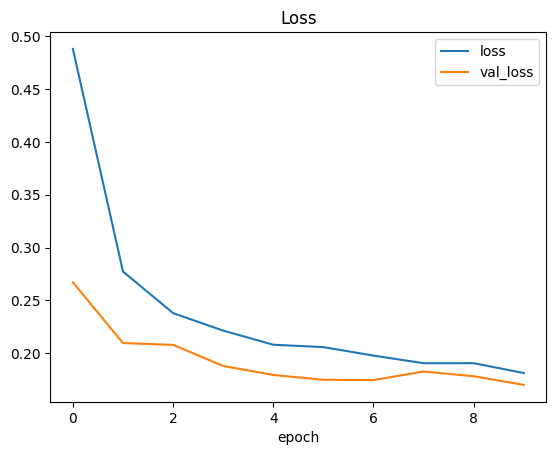

In [243]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

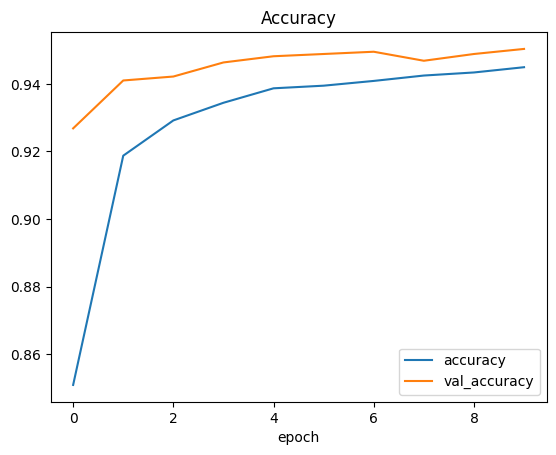

In [244]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [245]:
print(X_test.shape)
print(y_test.shape)


(10000, 784)
(10000, 10)


In [246]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test Score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test Score: 0.20657460391521454
Test accuracy: 0.9416999816894531


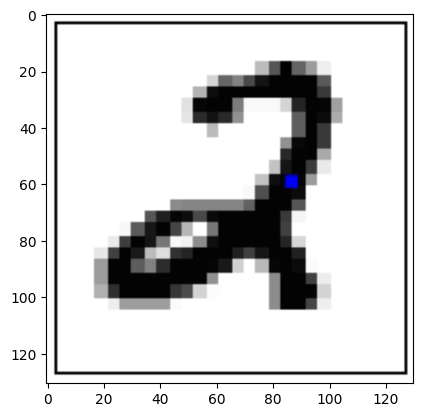

In [247]:
import requests
from PIL import Image

url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

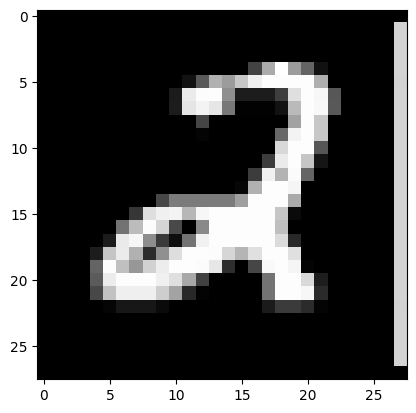

In [252]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
grayscale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(grayscale)
plt.imshow(image, cmap=plt.get_cmap("gray"))


In [253]:
image = image/255
image = image.reshape(1,784)

In [255]:
prediction = np.argmax(model.predict(image), axis=1)
print('Predicted Digits :', str(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Digits : [2]
